# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

- Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

In [98]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Make a request to the site to get the raw HTML

In [3]:
url ="https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"
resp= requests.get(url)
resp.status_code

200

- Create a BeautifulSoup object called `soup` to traverse this HTML.

In [4]:
soup= BeautifulSoup(resp.content)

In [ ]:
soup

- Scrap the whole rating table to a DataFrame

In [ ]:
columns=[]
for i,trs in enumerate(soup.select("#cacaoTable tr")):
    row= []
    for tds in trs.select("td"):
        if i == 0:
            columns.append(tds.get_text(strip=True)
                           .replace("\n","")
                           .replace("\xa0","")
                           .replace(" ","")
                           .replace("(","_")
                           .replace(")","")
                           .replace("-","")
                           )
            df=pd.DataFrame(columns=columns)
        else:
            # append rows in the df
            row.append(tds.get_text(strip=True).replace("\xa0",""))
    
    if i > 0:
        row = np.reshape(row, (1,9))
        
    df = df.append(pd.DataFrame(row,columns=columns),ignore_index = True)

In [57]:
df

,Company_Makerifknown,SpecificBeanOriginorBarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


- Clean the DataFrame

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company_Makerifknown         1795 non-null   object 
 1   SpecificBeanOriginorBarName  1795 non-null   object 
 2   REF                          1795 non-null   int64  
 3   ReviewDate                   1795 non-null   int64  
 4   CocoaPercent                 1795 non-null   float64
 5   CompanyLocation              1795 non-null   object 
 6   Rating                       1795 non-null   float64
 7   BeanType                     1795 non-null   object 
 8   BroadBeanOrigin              1795 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [107]:
df.Rating=pd.to_numeric(df.Rating)

In [108]:
df.REF=pd.to_numeric(df.REF)

In [109]:
df.ReviewDate=pd.to_datetime(df.ReviewDate, format='%Y-%m-%d').dt.year

In [110]:
df.CocoaPercent=df.CocoaPercent.str.replace("%","")

In [77]:
(df.CocoaPercent == np.NaN).sum()

0

In [111]:
df.CocoaPercent = pd.to_numeric(df.CocoaPercent,downcast="integer")

## How are ratings distributed?

- How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

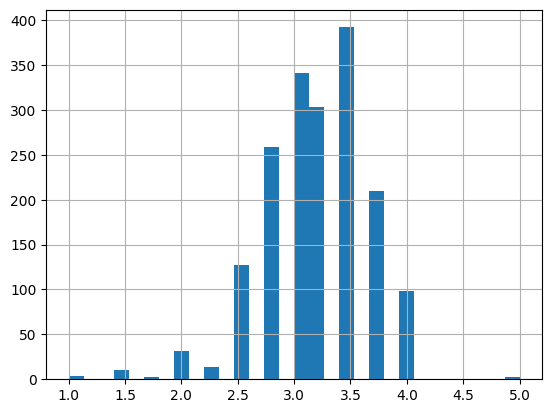

In [93]:
df.Rating.hist(bins=30);

In [96]:
#terrible mean Rating <2.5
print(f" Percentage of bad reviews is {round(((df.Rating < 2.5).sum()/df.shape[0])*100,2)}%")

 Percentage of bad reviews is 3.51%


In [95]:
print(f" Percentage of excellent reviews is {round(((df.Rating >= 5).sum()/df.shape[0])*100,2)}%")

 Percentage of excellent reviews is 0.11%


- Using Matplotlib, create a histogram of the ratings values:

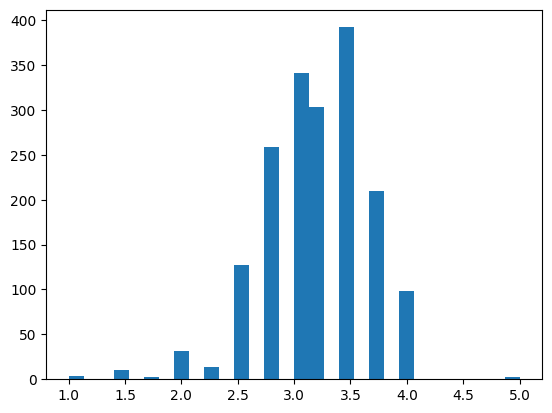

In [101]:
plt.hist(df.Rating,bins=30);

## Which chocolatier makes the best chocolate?

- We want to now find the 10 most highly rated chocolatiers. 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Company_Makerifknown         1795 non-null   object
 1   SpecificBeanOriginorBarName  1795 non-null   object
 2   REF                          1795 non-null   object
 3   ReviewDate                   1795 non-null   object
 4   CocoaPercent                 1795 non-null   object
 5   CompanyLocation              1795 non-null   object
 6   Rating                       1795 non-null   object
 7   BeanType                     1795 non-null   object
 8   BroadBeanOrigin              1795 non-null   object
dtypes: object(9)
memory usage: 126.3+ KB


In [134]:
df.head(5)

,Company_Makerifknown,SpecificBeanOriginorBarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [138]:
(
    df
    .groupby([df.Company_Makerifknown])
    .agg({"Rating": "sum","CompanyLocation":"max","CocoaPercent":"mean"})
    .nlargest(10,"Rating")
)

,Rating,CompanyLocation,CocoaPercent
Company_Makerifknown,,,
Soma,168.50,Canada,70.914894
Bonnat,92.75,France,75.555556
Fresco,88.00,U.S.A.,71.192308
Pralus,82.00,France,76.200000
A. Morin,77.75,France,69.086957
Arete,77.75,U.S.A.,70.636364
Domori,76.50,Italy,71.500000
Valrhona,70.00,France,67.523810
Guittard,69.75,U.S.A.,66.545455


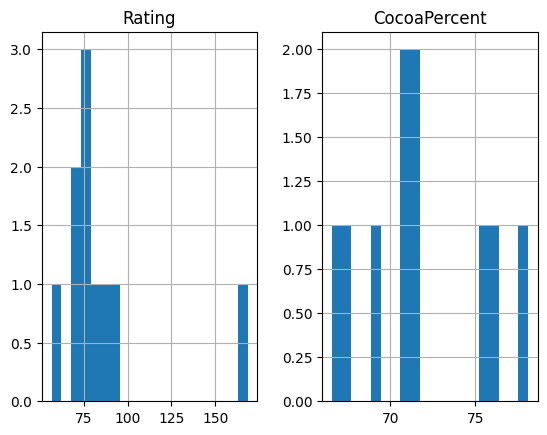

In [140]:
(
    df
    .groupby([df.Company_Makerifknown])
    .agg({"Rating": "sum","CompanyLocation":"max","CocoaPercent":"mean"})
    .nlargest(10,"Rating")
).hist(bins=20);

## Is more cacao better?

- We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

In [154]:
df_t=(
    df
    .groupby([df.CocoaPercent])
    .agg({"Rating": "sum"})
    .nlargest(10,"Rating")
).reset_index()

Text(0, 0.5, 'Cocoa %')

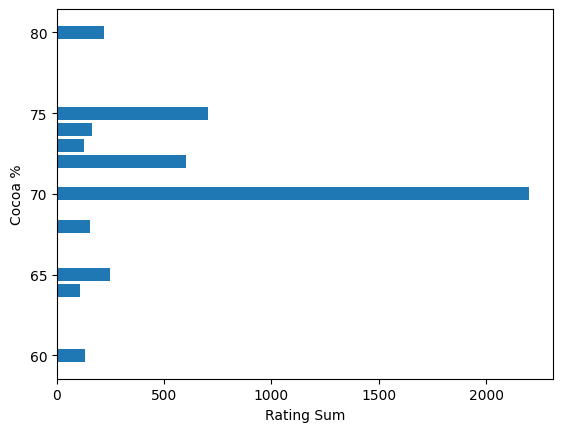

In [159]:
plt.barh(df_t.CocoaPercent,df_t.Rating)
plt.xlabel("Rating Sum")
plt.ylabel("Cocoa %")

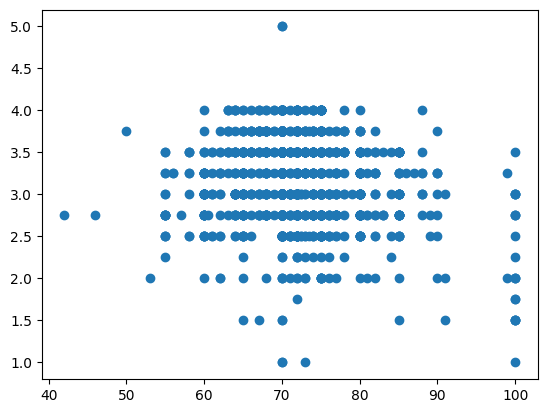

In [162]:
plt.clf()
plt.scatter(df.CocoaPercent,df.Rating)

- Is there any correlation here? 

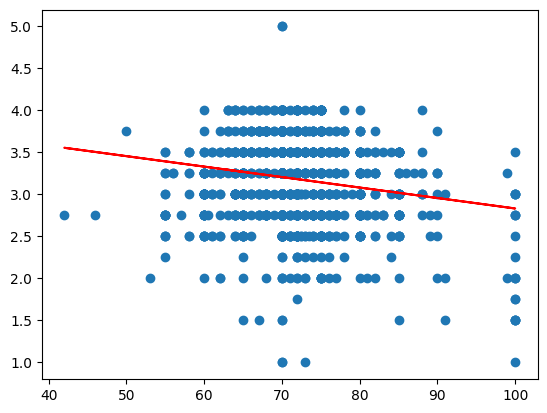

In [164]:
plt.clf()
plt.scatter(df.CocoaPercent,df.Rating)
z = np.polyfit(df.CocoaPercent, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercent, line_function(df.CocoaPercent), "r-");